In [1]:
!pip install wandb ml_collections

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.9 MB/s eta 0:00:00
  Created wheel for ml_collections: filename=ml_collections-0.1.1-py3-none-any.whl size=94524 sha256=c0155b934dd04307b92dec8fa91b227ae858ac7ba2af8c9b97293128f2d43935
  Stored in directory: /root/.cache/pip/wheels/fd/c2/0d/5d94d95e5875ea17b85a9f1f99b8dd2e50517137c8042c6468
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=331b7237850861b36cac37533fe7b4cc12044a4f2b1f71c82d76c28

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
os.chdir('./drive/MyDrive/ddpm_hw_clean')

In [4]:
import torch
import wandb
import torchvision

import numpy as np

from data_generator import DataGenerator
from default_mnist_config import create_default_mnist_config
from diffusion import DiffusionRunner
from models.classifier import ResNet, ResidualBlock, ConditionalResNet

from matplotlib import pyplot as plt

import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '3'

In [ ]:
!python3 train_ddpm_cont.py

100% 9912422/9912422 [00:00<00:00, 93754915.98it/s]
Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

100% 28881/28881 [00:00<00:00, 158554573.07it/s]
Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

100% 1648877/1648877 [00:00<00:00, 26572090.40it/s]
Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

100% 4542/4542 [00:00<00:00, 36217735.30it/s]
Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 2
wandb: You chose 'Use an existing W&B account'
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai 

[Ссылка на wandb](https://wandb.ai/bormix/sde/runs/i6wqlshh?workspace=user-bormix)

Приведем некоторые графики и результаты.

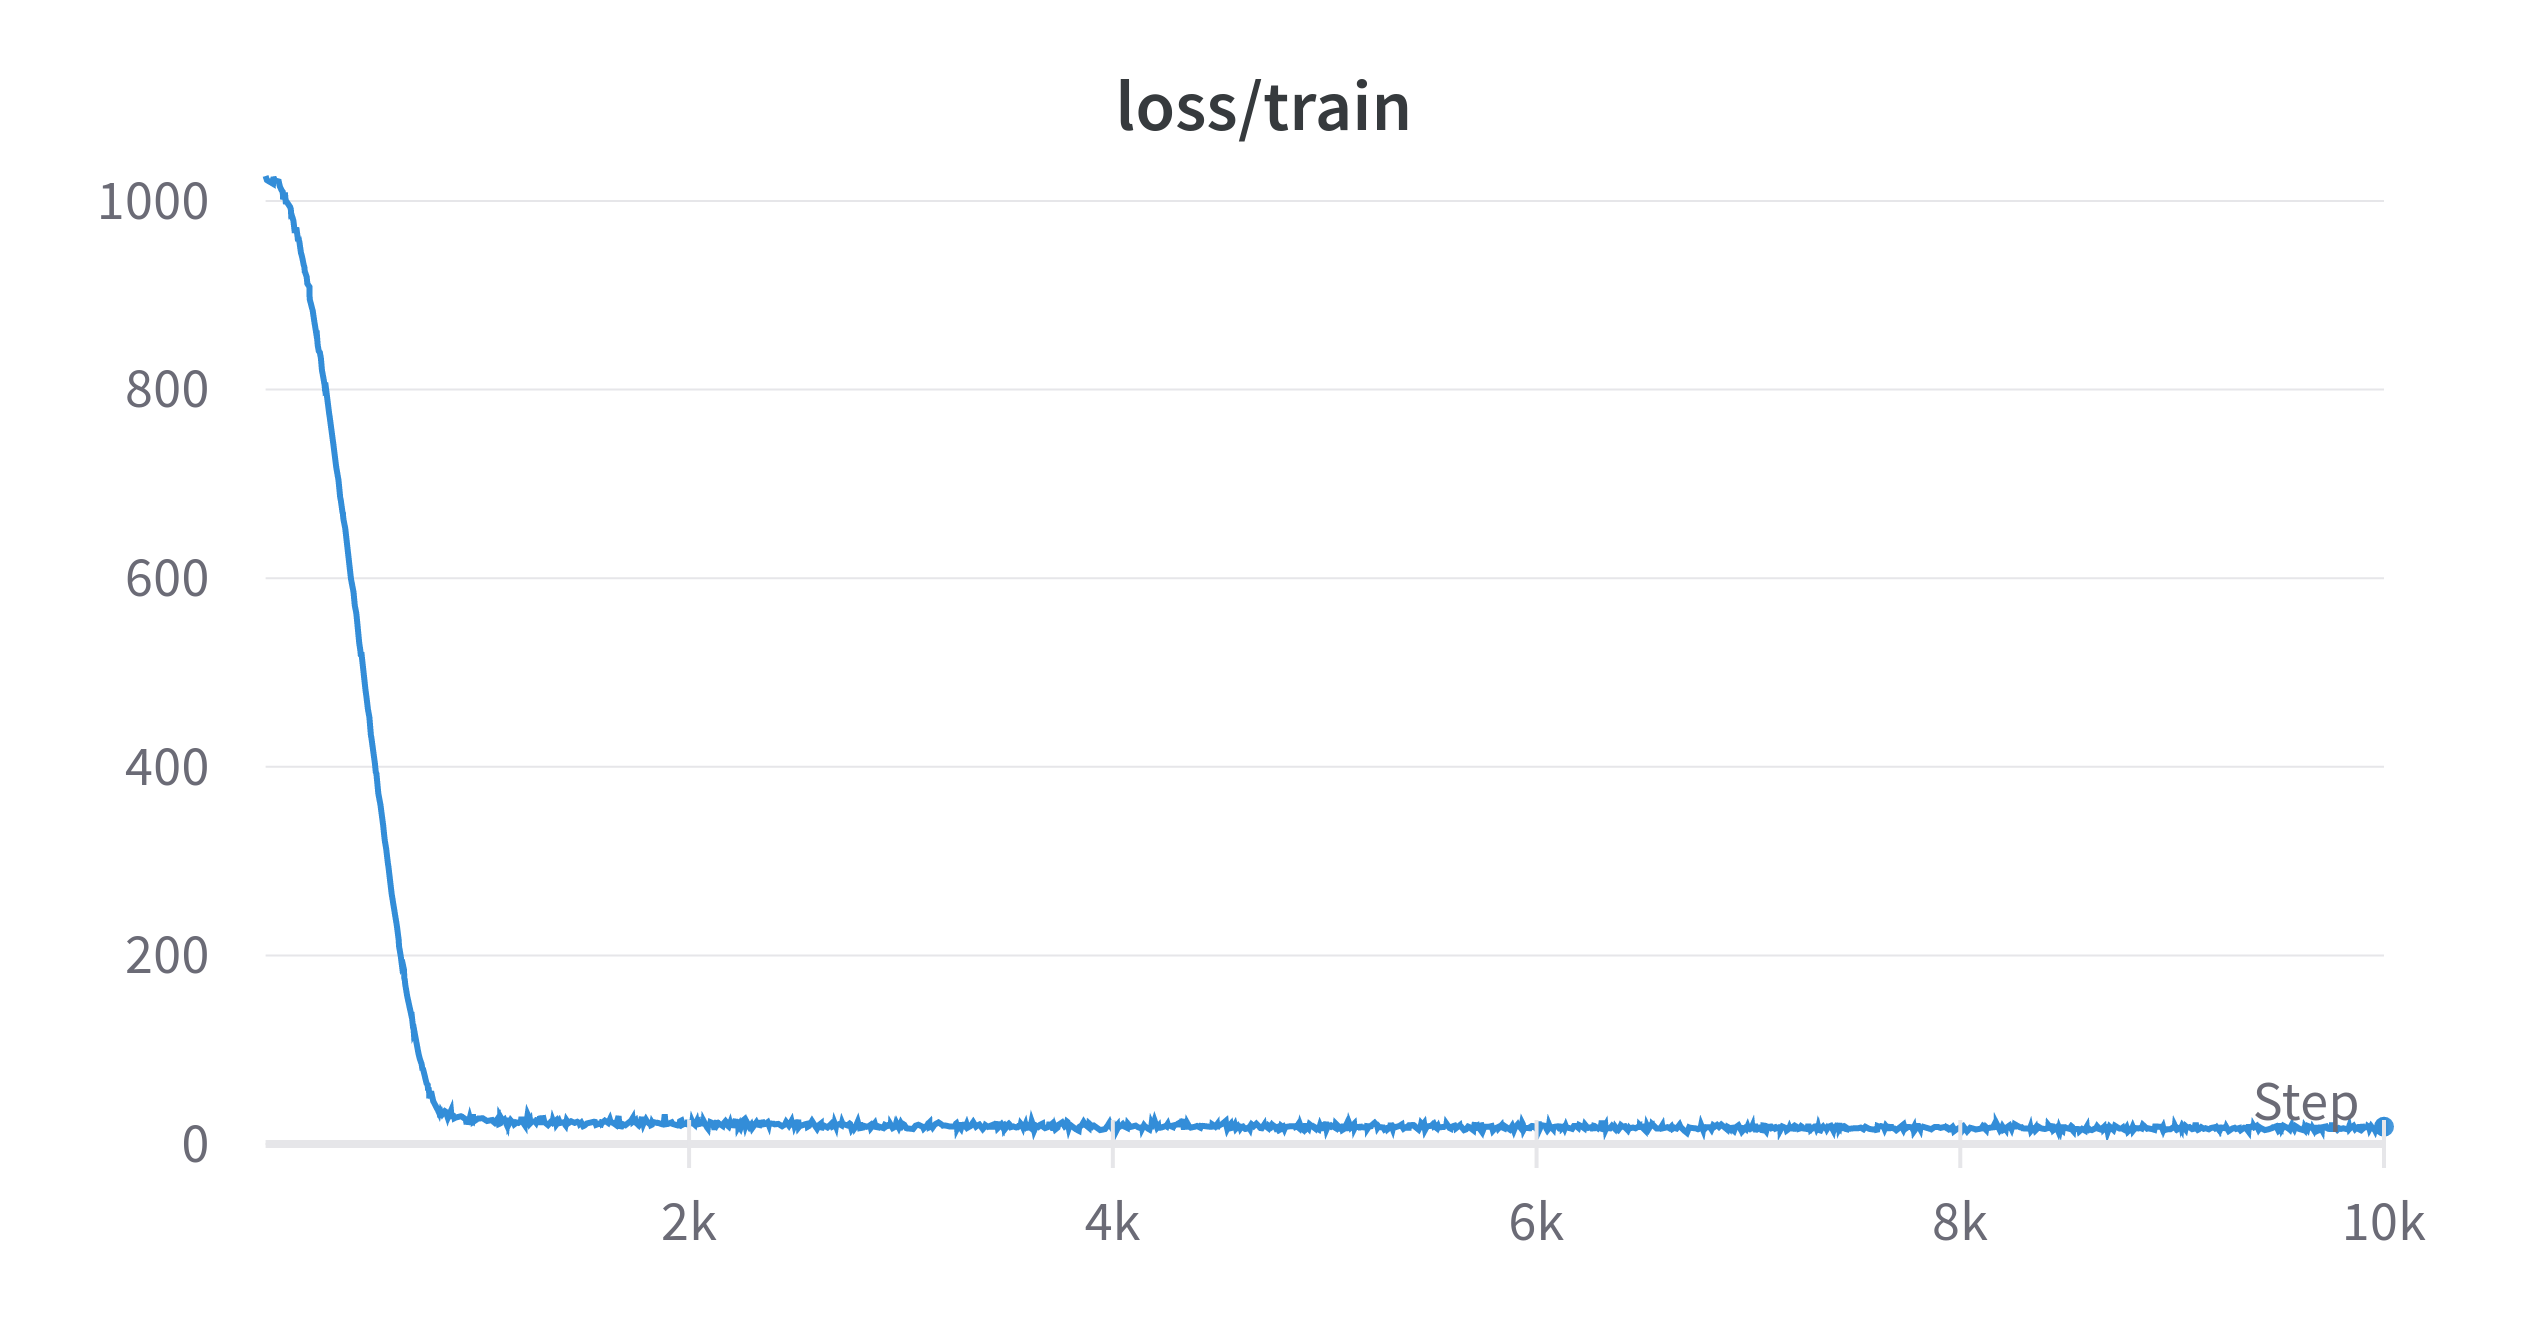

In [73]:
from PIL import Image
img = Image.open("/content/ddpm_train.png")
img

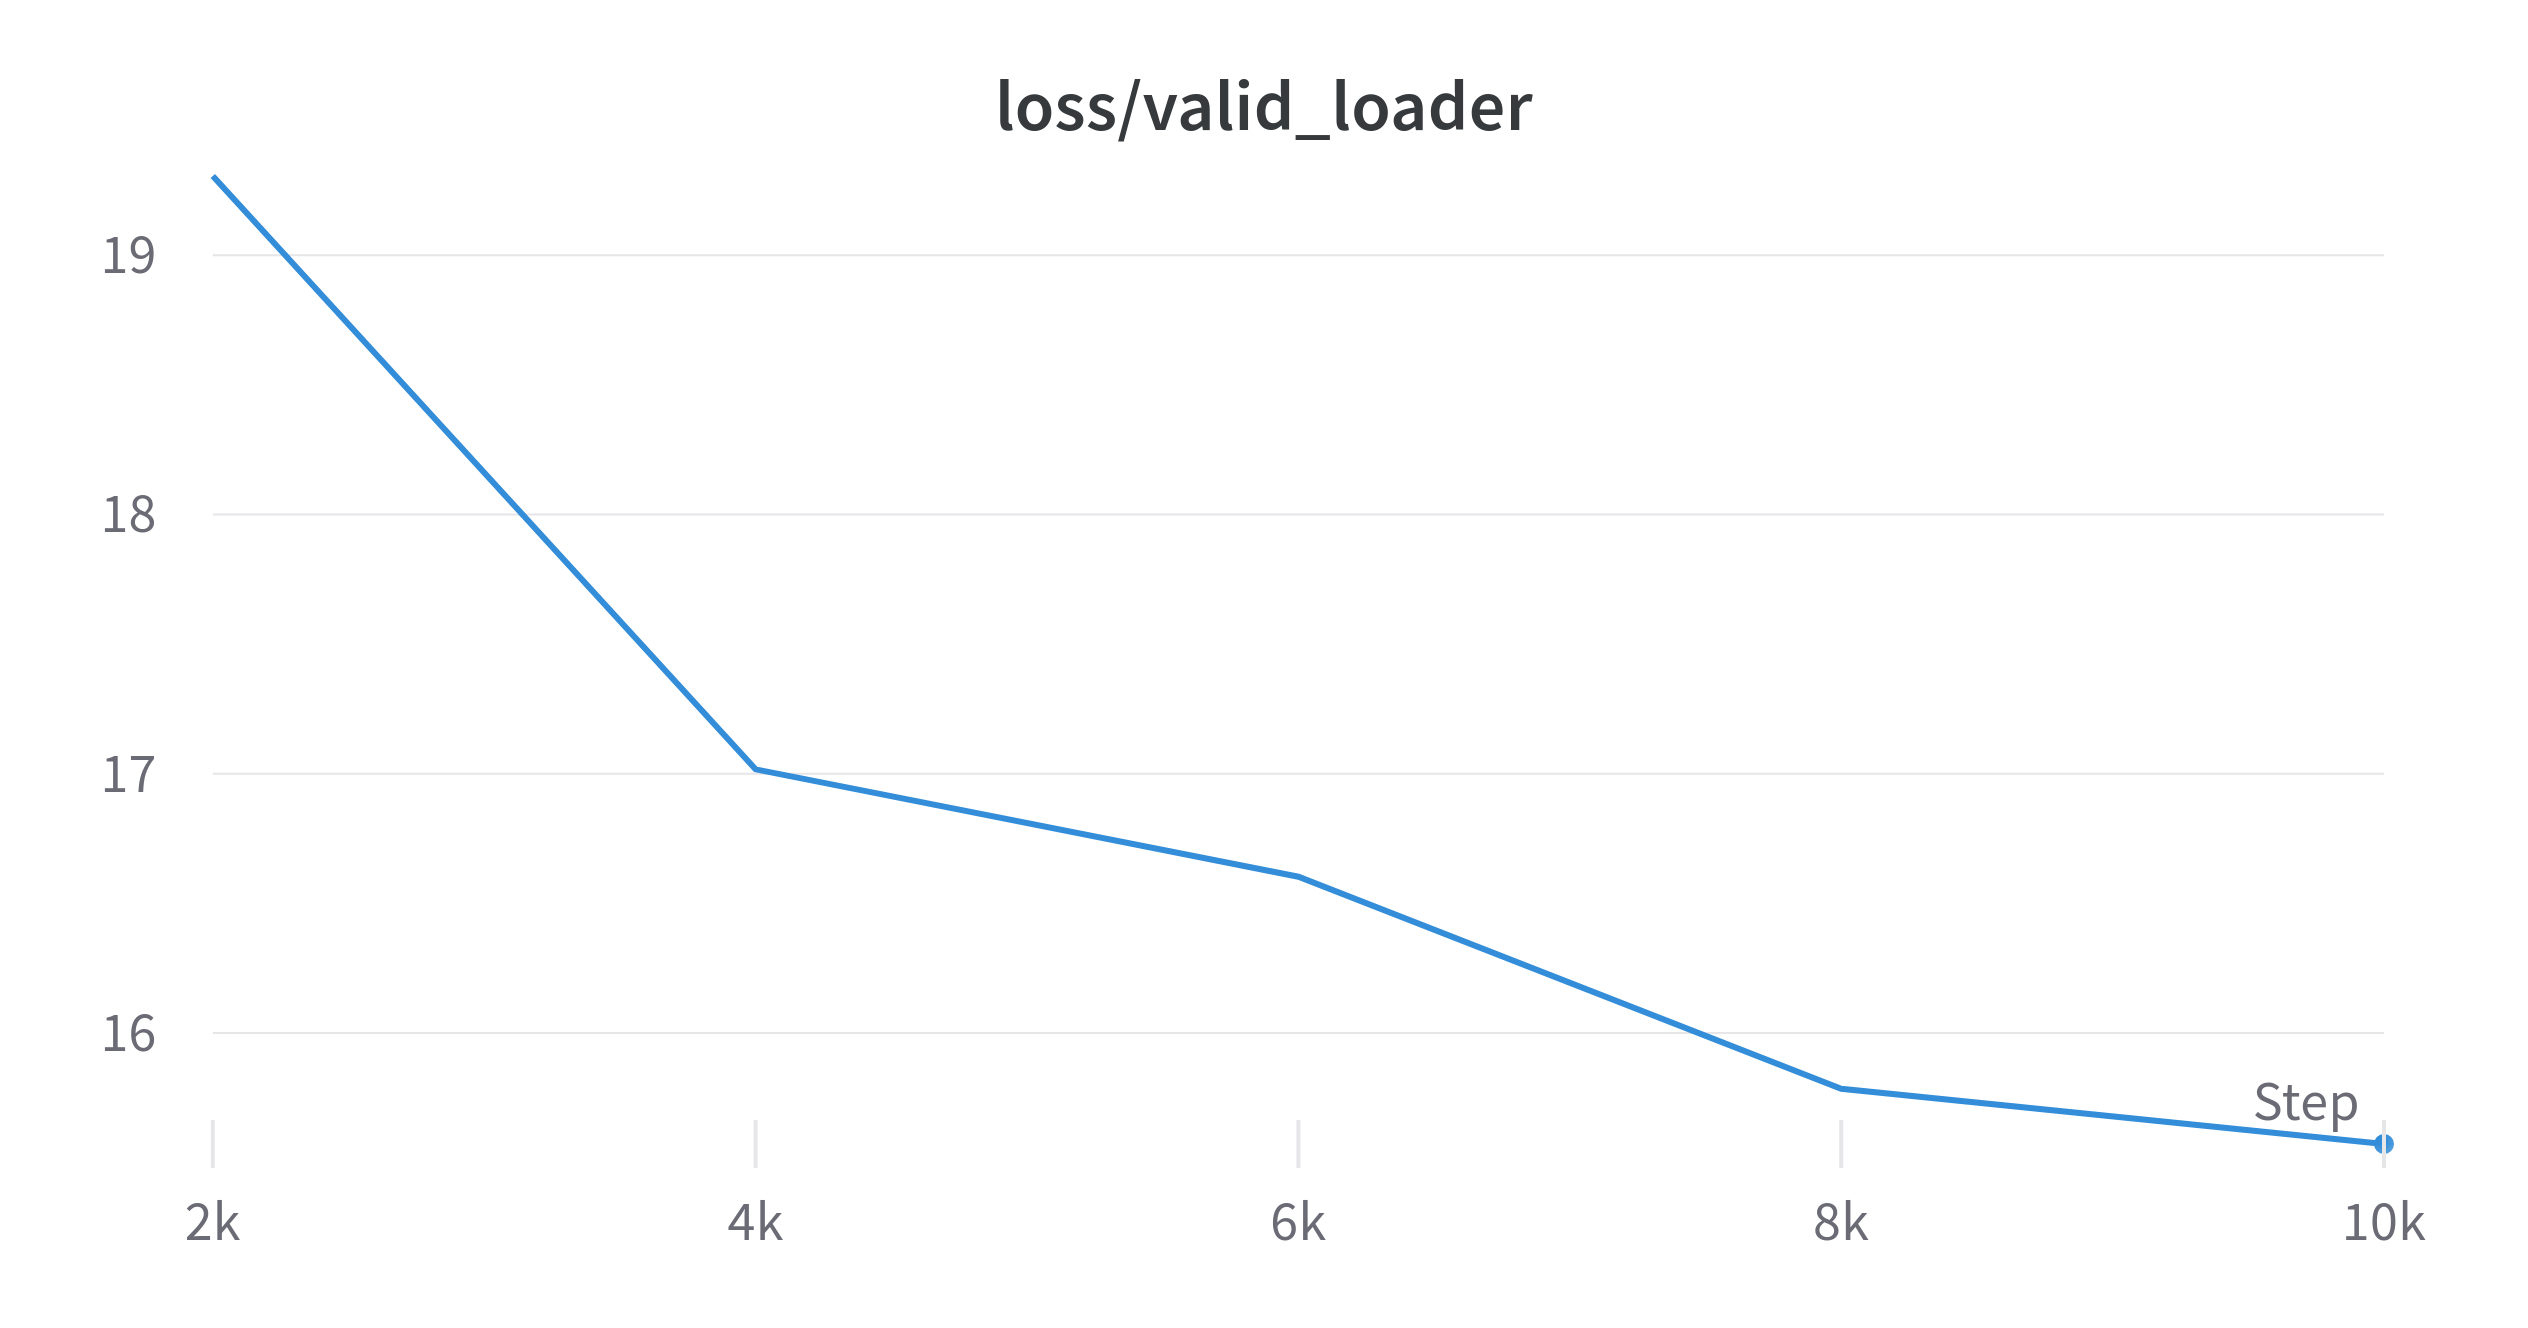

In [74]:
img = Image.open("/content/ddpm_valid.png")
img

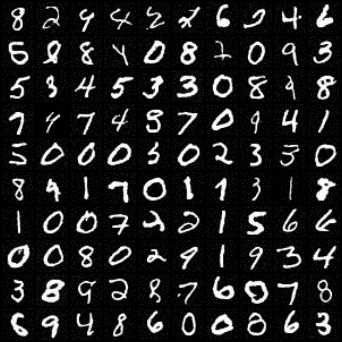

In [75]:
img = Image.open("/content/ddpm_gen.png")
img

In [ ]:
!python3 train_noisy_classifier.py

wandb: Currently logged in as: bormix. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.0
wandb: Run data is saved locally in /content/drive/MyDrive/ddpm_hw_clean/wandb/run-20230425_085047-i1qnzc99
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run noisy_classifier
wandb: ⭐️ View project at https://wandb.ai/bormix/sde
wandb: 🚀 View run at https://wandb.ai/bormix/sde/runs/i1qnzc99
100% 10000/10000 [22:30<00:00,  7.40it/s]
wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run history:
wandb:      accuracy/valid ▁▂▁▅█
wandb: cross_entropy/train █▇▆▅▃▄▂▅▃▃▃▂▄▃▂▁▃▅▃▂▄▃▂▅▃▃▃▄▃▄▄▄▄▄▃▂▃▄▅▁
wandb: cross_entropy/valid ▇██▄▁
wandb: 
wandb: Run summary:
wandb:      accuracy/valid 0.4518
wandb: cross_entropy/train 1.21321
wandb: cross_entropy/valid 1.64001
wandb: 
wandb: 🚀 View run noisy_classifier at: https://wandb.ai/bormix/sde/runs/i1qnzc99
wandb: Synced 5 W&B file(s), 5 media file(s), 0 artifact file(s) and 0 other file

[Ссылка на wandb](https://wandb.ai/bormix/sde/runs/i1qnzc99?workspace=user-bormix)

Рассмотрим некоторые графики и результаты.

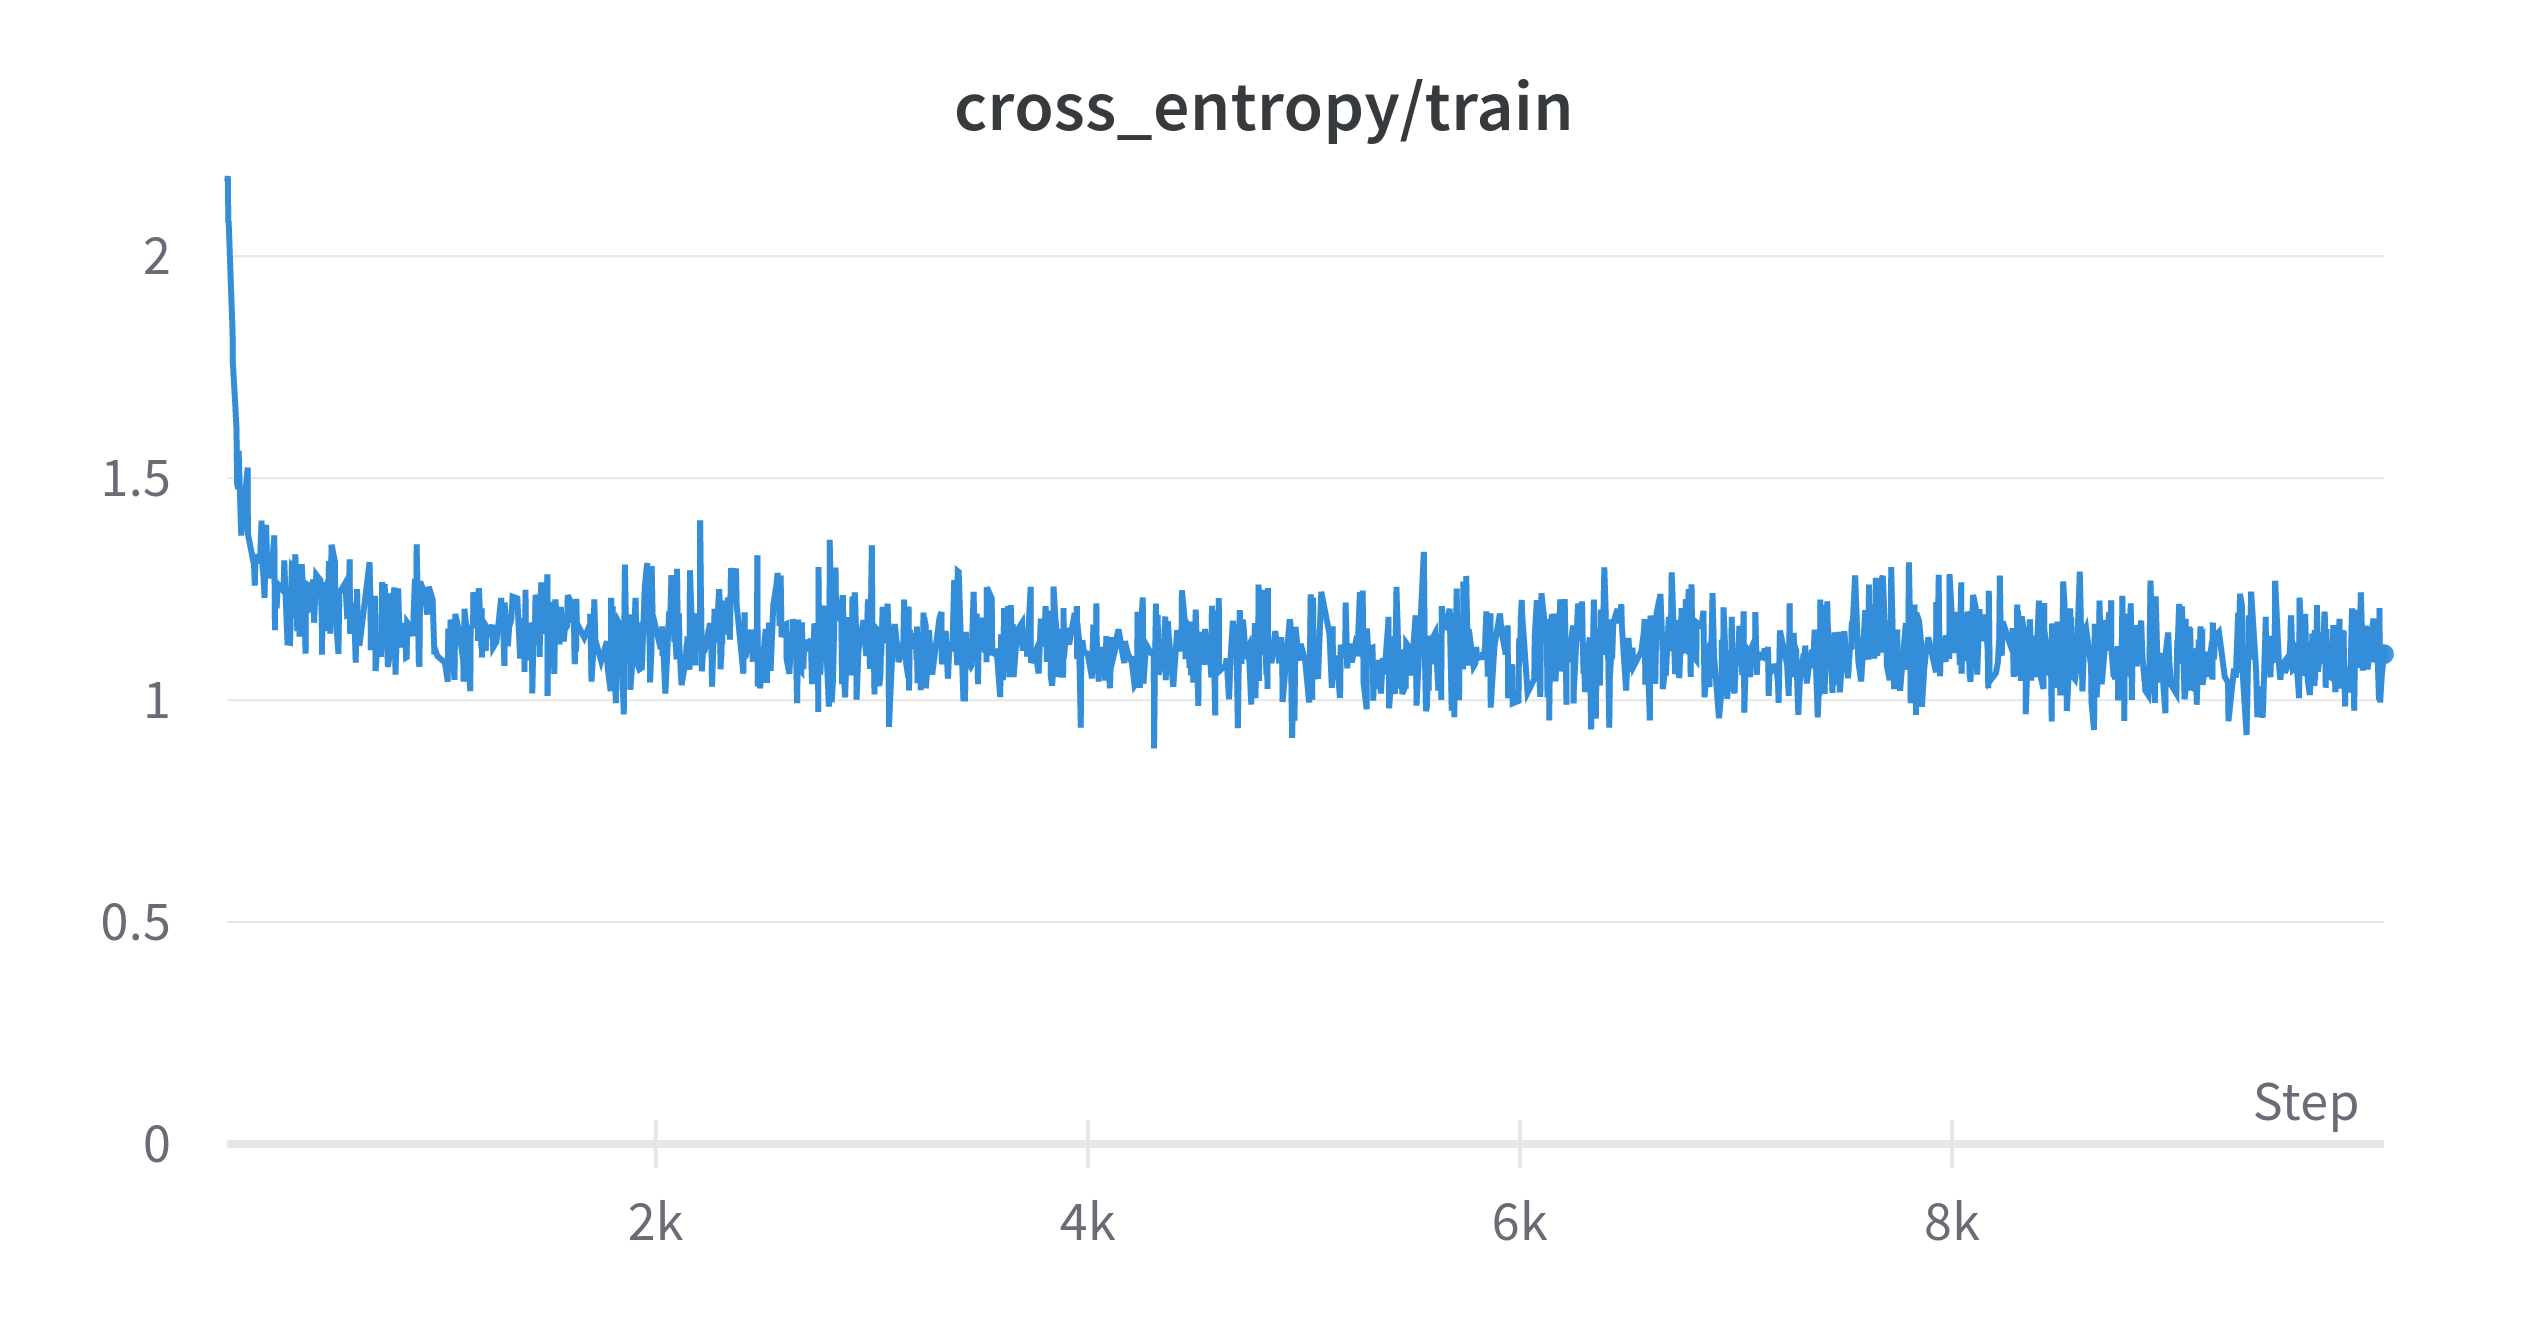

In [76]:
img = Image.open("/content/classifier_train.png")
img

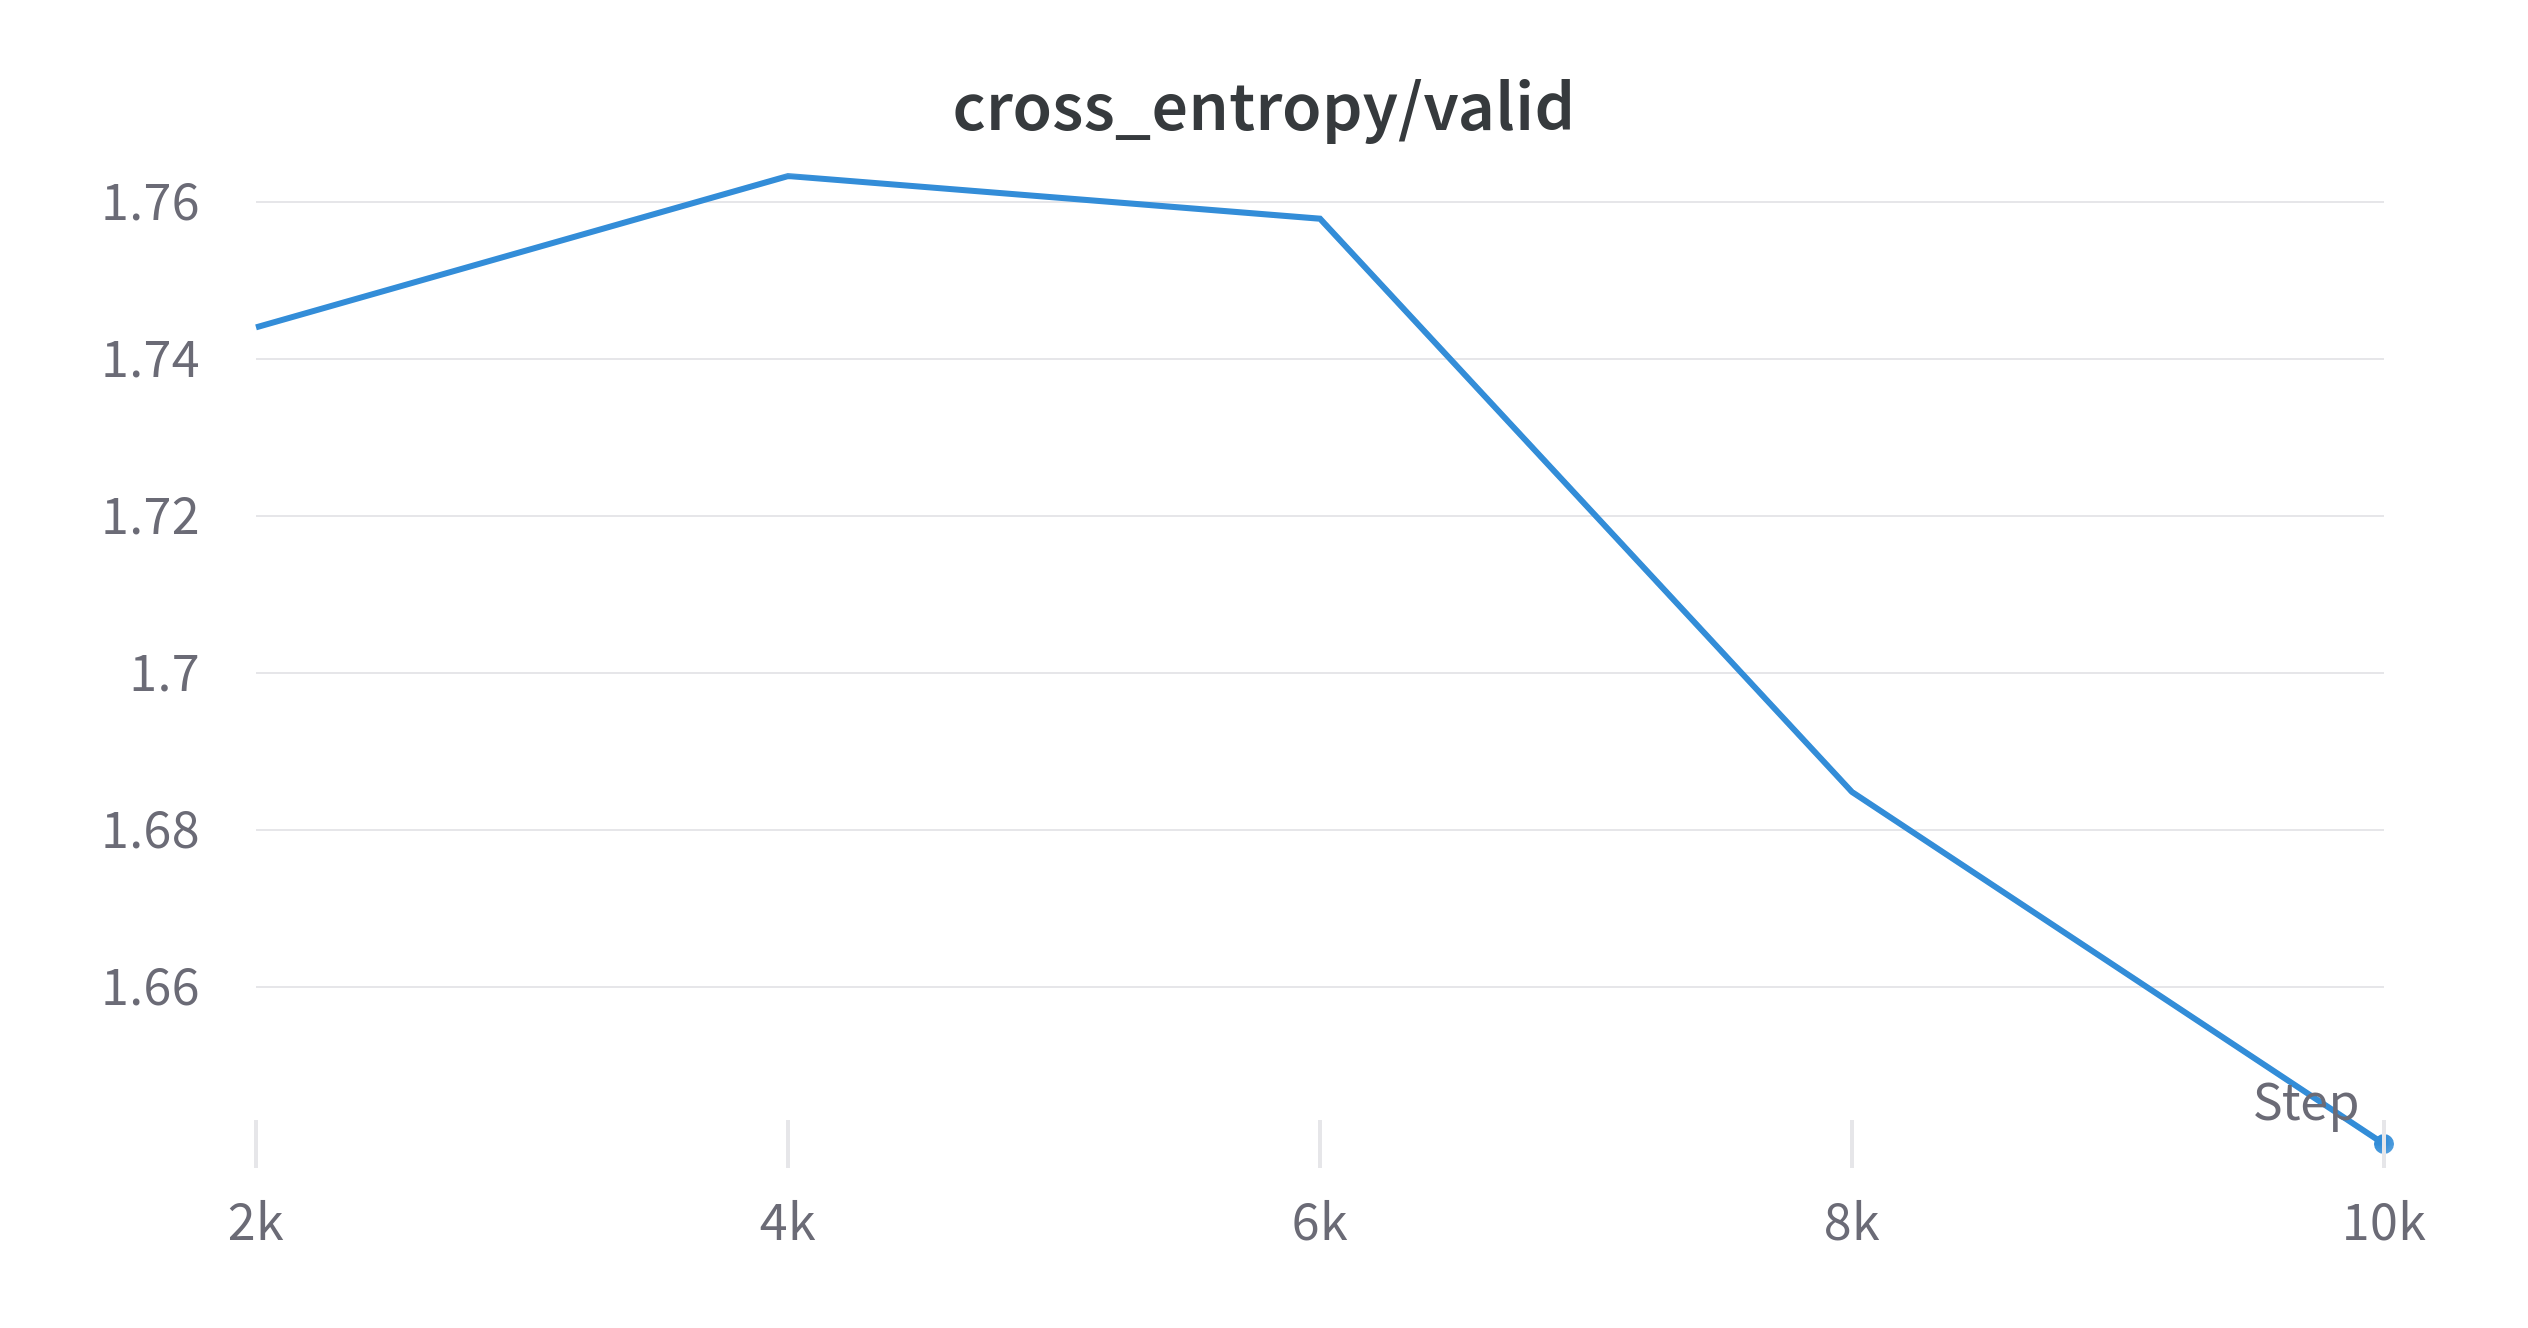

In [77]:
img = Image.open("/content/classifier_val.png")
img

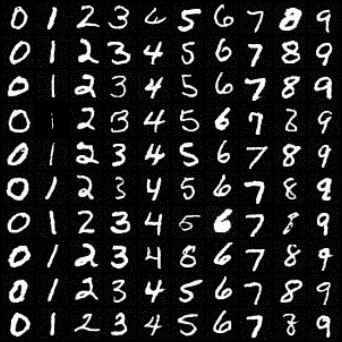

In [78]:
img = Image.open("/content/classifier_gen.png")
img

In [37]:
device = torch.device('cuda')
classifier_args = {
    "block": ResidualBlock,
    "layers": [2, 2, 2, 2]
}
noisy_classifier = ConditionalResNet(**classifier_args)
noisy_classifier.to(device)

noisy_classifier.load_state_dict(torch.load('./ddpm_checkpoints/classifier.pth'))

clean_classifier = ResNet(**classifier_args)
clean_classifier.to(device)
clean_classifier.eval()

clean_classifier.load_state_dict(torch.load('./ddpm_checkpoints/clean_classifier.pth'))

<All keys matched successfully>

#### Создайте два семплемера картинок, безусловный и условный с методом .set_classifier

In [38]:
conditional_diffusion = DiffusionRunner(create_default_mnist_config(), eval=True)
conditional_diffusion.set_classifier(noisy_classifier, T=1.)

unconditional_diffusion = DiffusionRunner(create_default_mnist_config(), eval=True)

In [39]:
def get_pred_labels(images_normed: torch.Tensor):
    """
    predict labels for normed images 
    [-1, 1]
    """
    pred = clean_classifier(images_normed)
    return torch.argmax(pred, dim=1)

def calc_acc_clean_classifier(images_normed: torch.Tensor, labels: torch.Tensor):
    """
    calculate accuracy using clean classifier
    """
    pred = get_pred_labels(images_normed)
    acc = torch.sum((pred == labels)) / labels.shape[0]
    return acc


def sample_images(diff_process, labels=None):
    images_tensor = diff_process.sample_images(batch_size=100, labels=labels)
    images_cpu = images_tensor.cpu()
    grid = torchvision.utils.make_grid(images_cpu, nrow=10).permute(1, 2, 0)
    grid = grid.data.numpy().astype(np.uint8)

    plt.imshow(grid)
    plt.show()
    return images_tensor


def cond_print_and_calc_acc(class_num: int):
    labels = class_num*torch.ones(100).long().to(device)
    images_tensor = sample_images(conditional_diffusion, labels)
    acc = calc_acc_clean_classifier((images_tensor - 127.5)/ 127.5, labels=labels)
    print('Accuracy: ', acc.item())
    return images_tensor

#### Посемплируйте наборы картинок всех классов обоими способами, изменить температуру можно с помощью повторного .set_classifier

Рассмотрим безусловную генерацию.

In [11]:
images_tensor = sample_images(unconditional_diffusion)

Результаты выглядят вполне приемлемо и качественно, однако порядок цифр нарушен, цифры попадают не в свои классы, т. к. при безусловной генерации не используется зависимость от них.

> Как сильно влияет температура на отличимость семплов при условной генерации? Продеменстрируйте для разных T свои выводы.



Рассмотрим условную генерацию с различными значениями температуры.

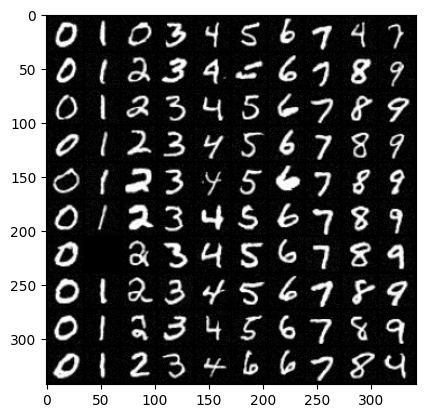

In [12]:
labels = np.tile(np.arange(10), (10, 1))
labels = torch.Tensor(labels).long().view(-1)

#T=1 by default
images_tensor = sample_images(conditional_diffusion, labels)

В целом при стандартном значении температуры 1 результаты достаточно качественные, почти для всех классов цифры сгенерированы верно, однако все же есть ошибки и пустые результаты генерации.

Рассмотрим при большей температуре.

In [14]:
conditional_diffusion.set_classifier(noisy_classifier, T=2)
images_tensor = sample_images(conditional_diffusion, labels)

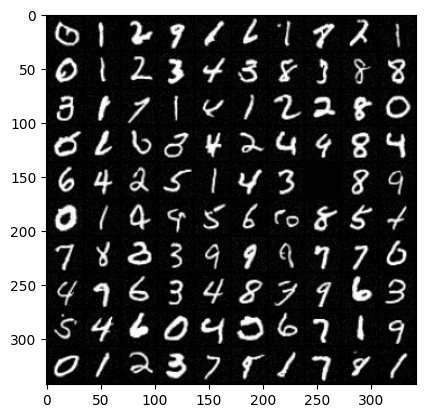

In [13]:
conditional_diffusion.set_classifier(noisy_classifier, T=5)
images_tensor = sample_images(conditional_diffusion, labels)

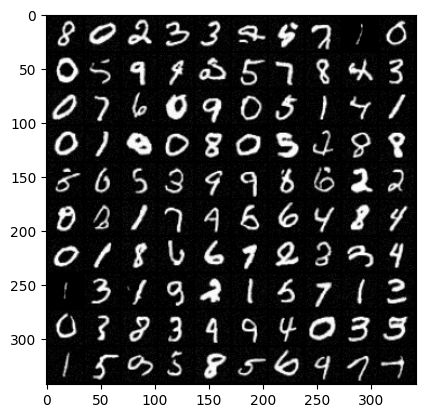

In [15]:
conditional_diffusion.set_classifier(noisy_classifier, T=7)
images_tensor = sample_images(conditional_diffusion, labels)

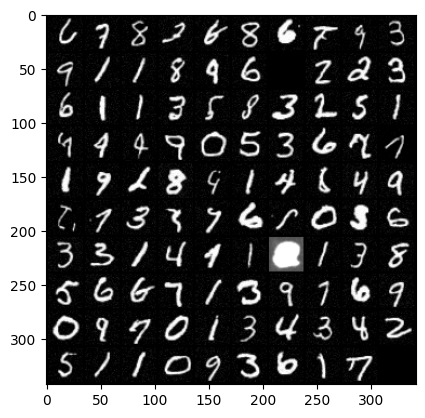

In [16]:
conditional_diffusion.set_classifier(noisy_classifier, T=10)
images_tensor = sample_images(conditional_diffusion, labels)

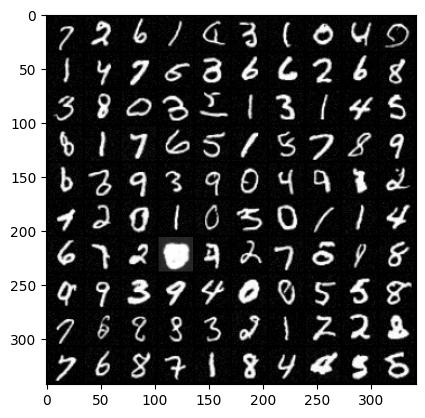

In [17]:
conditional_diffusion.set_classifier(noisy_classifier, T=15)
images_tensor = sample_images(conditional_diffusion, labels)

Таким образом, с ростом параметра температуры качество генерации падает, появляются похожие на шум или пустые картинки цифр, а также цифры все чаще попадают не в свои, в произвольные классы, генерация становится близкой к безусловной. В целом это ожидаемо и логично, при больших Т и делении на них вклад классификатора в скор заметно снижается, меньше используется информация о классах. При этом заметно несколько больше некачественных или шумовых цифр. 

Рассмотрим значения температуры меньше 1.

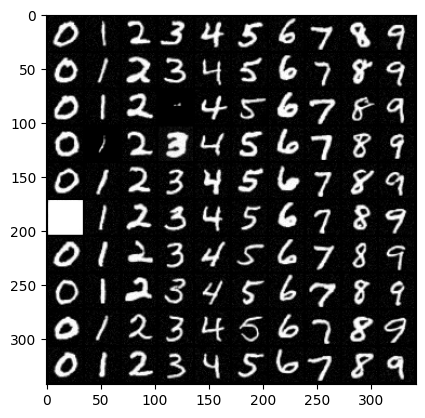

In [18]:
conditional_diffusion.set_classifier(noisy_classifier, T=0.5)
images_tensor = sample_images(conditional_diffusion, labels)

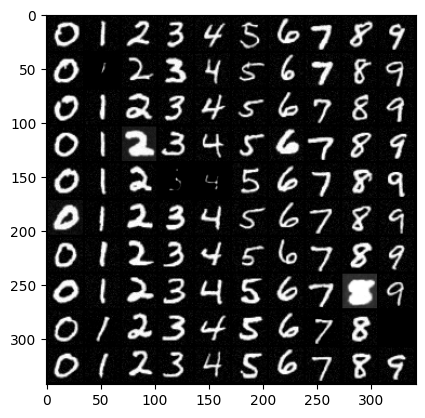

In [20]:
conditional_diffusion.set_classifier(noisy_classifier, T=0.25)
images_tensor = sample_images(conditional_diffusion, labels)

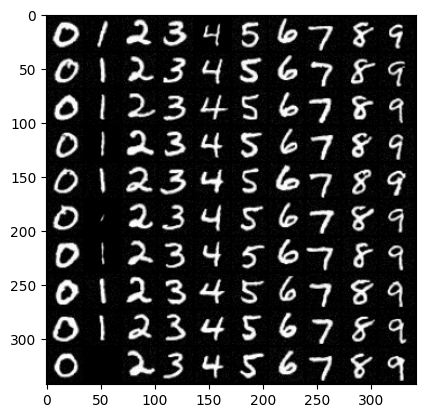

In [19]:
conditional_diffusion.set_classifier(noisy_classifier, T=0.1)
images_tensor = sample_images(conditional_diffusion, labels)

In [21]:
conditional_diffusion.set_classifier(noisy_classifier, T=0.01)
images_tensor = sample_images(conditional_diffusion, labels)

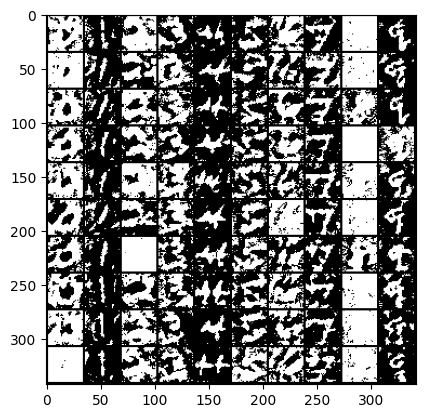

In [22]:
conditional_diffusion.set_classifier(noisy_classifier, T=0.001)
images_tensor = sample_images(conditional_diffusion, labels)

При малых Т наоборот вклад классификатора в скор становится весомым, цифры четко находятся в своих классах, однако при слишком малых Т часть классификатора начинает иметь слишком большой вес, что значительно снижает качество самой генерации, изображения становятся ближе к шуму. 

В целом предварительно наилучшие результаты достигаются для T=0.1, также для Т=1 качество также в целом удовлетворительно.

> Какое качество получается у чистого классификатора при условной генерации? Попробуйте оценить на глаз качество чистого классификатора для безусловной генерации, объясните свои выводы.


Рассмотрим результаты условной генерации по классам. Рассмотрим при этом два значения температуры 1 и 0.1 как визуально одни из лучших среди рассмотренных ранее.

Рассмотрим T=1.

In [60]:
conditional_diffusion.set_classifier(noisy_classifier, T=1)
acc = cond_print_and_calc_acc(0)

Accuracy:  0.19999998807907104


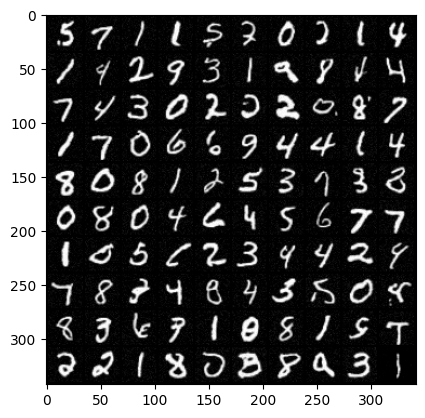

Accuracy:  0.14000000059604645


In [61]:
acc = cond_print_and_calc_acc(1)

In [62]:
acc = cond_print_and_calc_acc(2)

Accuracy:  0.14000000059604645


In [63]:
acc = cond_print_and_calc_acc(3)

Accuracy:  0.14999999105930328


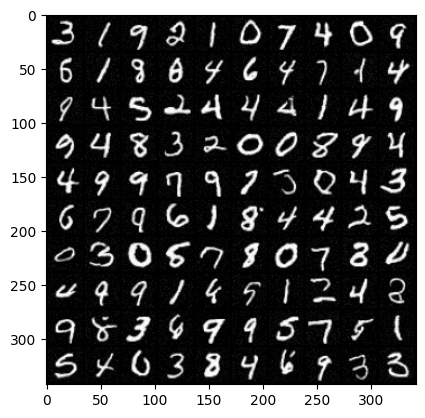

Accuracy:  0.19999998807907104


In [64]:
acc = cond_print_and_calc_acc(4)

In [65]:
acc = cond_print_and_calc_acc(5)

Accuracy:  0.03999999910593033


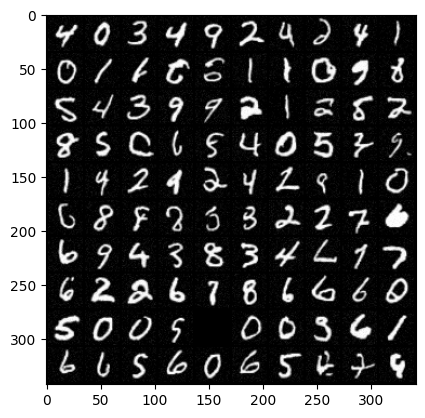

Accuracy:  0.1599999964237213


In [66]:
acc = cond_print_and_calc_acc(6)

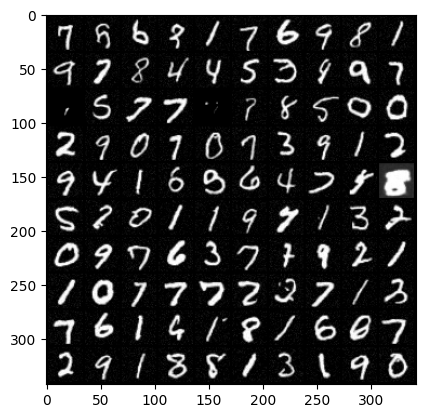

Accuracy:  0.19999998807907104


In [67]:
acc = cond_print_and_calc_acc(7)

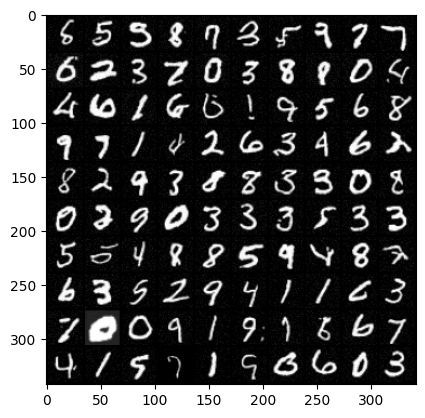

Accuracy:  0.11999999731779099


In [68]:
acc = cond_print_and_calc_acc(8)

In [69]:
acc = cond_print_and_calc_acc(9)

Accuracy:  0.17999999225139618


Точность по классам довольно низкая, заметны артефакты при генерации, качество в целом не столь высокое.

Рассмотрим T=0.1

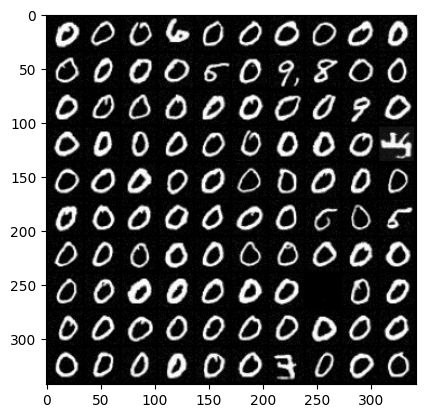

Accuracy:  0.9099999666213989


In [50]:
conditional_diffusion.set_classifier(noisy_classifier, T=0.1)
acc = cond_print_and_calc_acc(0)

In [51]:
acc = cond_print_and_calc_acc(1)

Accuracy:  0.8899999856948853


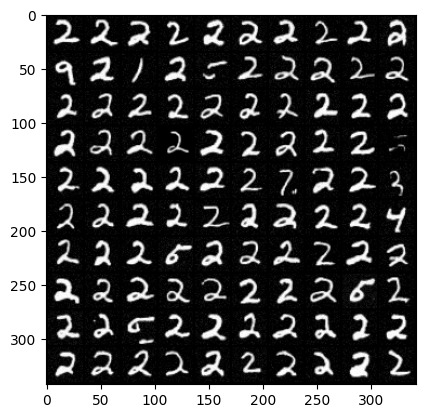

Accuracy:  0.9099999666213989


In [52]:
acc = cond_print_and_calc_acc(2)

In [53]:
acc = cond_print_and_calc_acc(3)

Accuracy:  0.9300000071525574


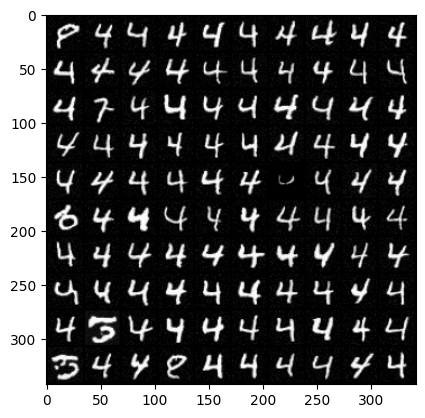

Accuracy:  0.9300000071525574


In [54]:
acc = cond_print_and_calc_acc(4)

In [55]:
acc = cond_print_and_calc_acc(5)

Accuracy:  0.9099999666213989


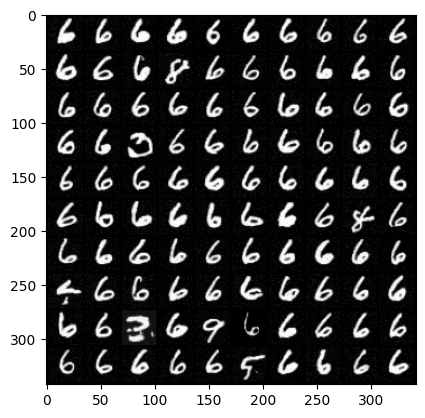

Accuracy:  0.9300000071525574


In [56]:
acc = cond_print_and_calc_acc(6)

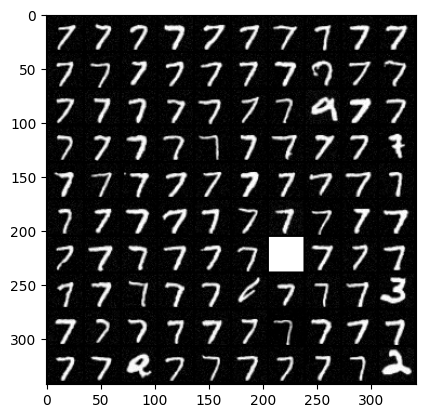

Accuracy:  0.9399999976158142


In [57]:
acc = cond_print_and_calc_acc(7)

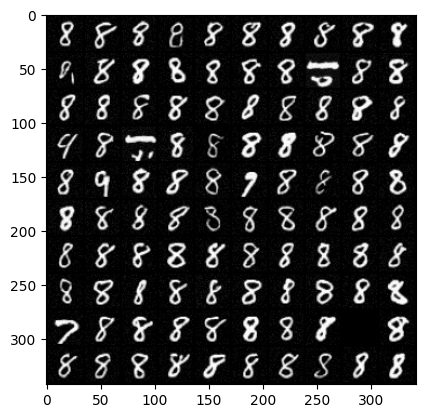

Accuracy:  0.9099999666213989


In [58]:
acc = cond_print_and_calc_acc(8)

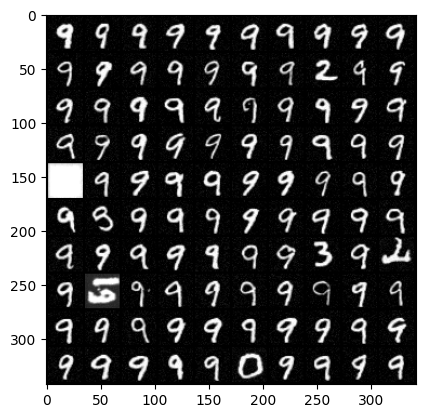

Accuracy:  0.949999988079071


In [59]:
acc = cond_print_and_calc_acc(9)

Таким образом, для температуры равной 0.1 результаты гораздо качественнее и точнее с точки зрения попадания в класс, точность довольно высока и близка к единице. Для температуры 1 очень редко правильно сопоставляется класс, и встречается больше артефактов при генерации. Таким образом, значение 0.1 для температуры оказалось наилучшим из рассмотренных.

Для наглядности сравнения вновь рассмотрим результаты для безусловной генерации.

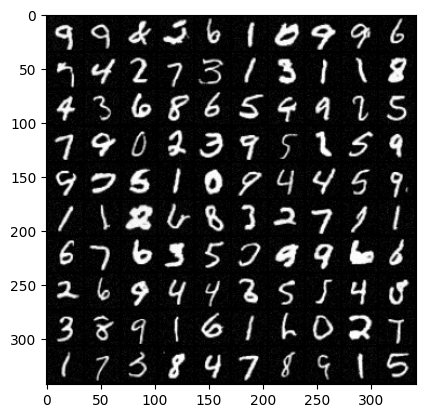

In [70]:
images_tensor = sample_images(unconditional_diffusion)

In [71]:
images_tensor = sample_images(unconditional_diffusion)

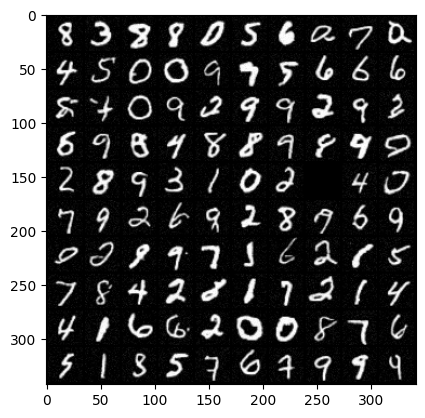

In [72]:
images_tensor = sample_images(unconditional_diffusion)

В целом можно сказать, что визуально качество для безусловной генерации вполне приемлемо, однако заметно больше артефактов и низкокачественных цифр, чем для условной генерации. Также при безусловной не используется информация о классах, цифры генерируются неупорядоченно. Таким образом, результаты условной генерации качественнее сами по себе и с точки зрения попадания в нужный класс, и использование в ней информации о метках классов, т. е. известного дополнительно свойства объектов, и латентных переменных в целом позволяет повысить качество генерации.

Стоит отметить, что модели обучались не все предполагаемое изначально отведенное время, поэтому возможно при более длительном полноценном обучении результаты были бы иными. Однако полученные результаты при меньшем числе итераций обучения и меньшем числе сгенерированных изображений в целом видятся вполне адекватными и логичными. 